In [1]:
import pandas as pd
import numpy as np

# VARIABLE

In [2]:
PATH = '2021_Yellow_Taxi_Trip_Data.csv'

# PRE-PROCESSING

In [3]:
df = pd.read_csv(PATH)
df.head(10)

C:\Users\trang\AppData\Local\Temp\ipykernel_6868\2367061952.py:1: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2021 12:30:10 AM,01/01/2021 12:36:12 AM,1.0,2.10,1.0,N,142.0,43.0,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1,01/01/2021 12:51:20 AM,01/01/2021 12:52:19 AM,1.0,0.20,1.0,N,238.0,151.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1,01/01/2021 12:43:30 AM,01/01/2021 01:11:06 AM,1.0,14.70,1.0,N,132.0,165.0,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1,01/01/2021 12:15:48 AM,01/01/2021 12:31:01 AM,0.0,10.60,1.0,N,138.0,132.0,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2,01/01/2021 12:31:49 AM,01/01/2021 12:48:21 AM,1.0,4.94,1.0,N,68.0,33.0,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5
5,1,01/01/2021 12:16:29 AM,01/01/2021 12:24:30 AM,1.0,1.60,1.0,N,224.0,68.0,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
6,1,01/01/2021 12:00:28 AM,01/01/2021 12:17:28 AM,1.0,4.10,1.0,N,95.0,157.0,2.0,16.0,0.5,0.5,0.00,0.0,0.3,17.30,0.0
7,1,01/01/2021 12:12:29 AM,01/01/2021 12:30:34 AM,1.0,5.70,1.0,N,90.0,40.0,2.0,18.0,3.0,0.5,0.00,0.0,0.3,21.80,2.5
8,1,01/01/2021 12:39:16 AM,01/01/2021 01:00:13 AM,1.0,9.10,1.0,N,97.0,129.0,4.0,27.5,0.5,0.5,0.00,0.0,0.3,28.80,0.0
9,1,01/01/2021 12:26:12 AM,01/01/2021 12:39:46 AM,2.0,2.70,1.0,N,263.0,142.0,1.0,12.0,3.0,0.5,3.15,0.0,0.3,18.95,2.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967103 entries, 0 to 5967102
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), object(4)
memory usage: 819.5+ MB


Return the df for statisic NaN values

In [14]:
df_statisic = pd.DataFrame(df.isnull().sum())
df_statisic.reset_index(inplace=True)

df_statisic.columns = ['column name','NaN']
df_statisic['% NaN'] = round((df_statisic['NaN'] / len(df) *100),5)

df_statisic

,column name,NaN,% NaN
0,VendorID,324518,5.43845
1,tpep_pickup_datetime,4,0.00007
2,tpep_dropoff_datetime,4,0.00007
3,passenger_count,324523,5.43854
4,trip_distance,5,0.00008
5,RatecodeID,324523,5.43854
6,store_and_fwd_flag,324523,5.43854
7,PULocationID,5,0.00008
8,DOLocationID,5,0.00008
9,payment_type,324523,5.43854


In [15]:
# Drop 1 giá trị date bị nhiễu

df.drop(df[df['tpep_dropoff_datetime'] == '04/20/2021 08:{'].index, inplace=True)

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

C:\Users\trang\AppData\Local\Temp\ipykernel_6868\748350833.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [25]:
# Convert về datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.dtypes

C:\Users\trang\AppData\Local\Temp\ipykernel_6868\958981801.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

 Xử lý NaN số ít

In [26]:
df['tpep_pickup_datetime'].value_counts()

tpep_pickup_datetime
2021-03-22 10:50:00    14
2021-03-18 12:29:00    13
2021-02-13 14:45:00    13
2021-01-14 13:52:00    13
2021-03-23 14:11:00    13
                       ..
2021-02-20 08:52:31     1
2021-02-20 08:59:05     1
2021-02-20 08:30:55     1
2021-02-20 08:33:27     1
2021-04-20 20:37:58     1
Name: count, Length: 3831560, dtype: int64

In [27]:
df['tpep_pickup_datetime'].isnull().sum()

0

In [28]:
df['tpep_pickup_datetime']

0         2021-01-01 00:30:10
1         2021-01-01 00:51:20
2         2021-01-01 00:43:30
3         2021-01-01 00:15:48
4         2021-01-01 00:31:49
                  ...        
5967093   2021-04-20 20:34:42
5967094   2021-04-20 20:52:51
5967095   2021-04-20 20:07:34
5967096   2021-04-20 20:23:15
5967097   2021-04-20 20:37:58
Name: tpep_pickup_datetime, Length: 5967098, dtype: datetime64[ns]

In [29]:
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
5967088,2,2021-04-20 20:16:28,2021-04-20 20:22:19,5.0,1.46,1.0,N,68.0,48.0,2.0,6.5,0.5,0.5,0.00,0.0,0.3,10.30,2.5
5967089,2,2021-04-20 20:28:13,2021-04-20 20:42:27,5.0,2.60,1.0,N,43.0,263.0,2.0,12.0,0.5,0.5,0.00,0.0,0.3,15.80,2.5
5967090,2,2021-04-20 20:50:54,2021-04-20 21:04:16,5.0,3.20,1.0,N,43.0,68.0,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
5967091,1,2021-04-20 20:11:46,2021-04-20 20:16:11,2.0,0.90,1.0,N,249.0,234.0,1.0,5.5,3.0,0.5,1.85,0.0,0.3,11.15,2.5
5967092,1,2021-04-20 20:17:12,2021-04-20 20:33:39,2.0,2.50,1.0,N,234.0,237.0,1.0,13.0,3.0,0.5,2.00,0.0,0.3,18.80,2.5
5967093,1,2021-04-20 20:34:42,2021-04-20 20:41:45,0.0,1.70,1.0,N,237.0,164.0,1.0,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5
5967094,1,2021-04-20 20:52:51,2021-04-20 21:11:38,2.0,3.60,1.0,N,249.0,239.0,1.0,15.5,3.0,0.5,5.79,0.0,0.3,25.09,2.5
5967095,2,2021-04-20 20:07:34,2021-04-20 20:25:31,1.0,2.87,1.0,N,141.0,238.0,1.0,14.0,0.5,0.5,4.45,0.0,0.3,22.25,2.5
5967096,1,2021-04-20 20:23:15,2021-04-20 20:32:48,1.0,1.60,1.0,N,161.0,68.0,1.0,8.5,3.0,0.5,0.00,0.0,0.3,12.30,2.5
5967097,1,2021-04-20 20:37:58,2021-04-20 20:44:31,1.0,1.40,1.0,N,48.0,237.0,1.0,6.5,3.0,0.5,1.00,0.0,0.3,11.30,2.5


In [30]:
# Vì các cột có số lượng NaN <= 5 tập trung ở các record cuối -> remove

df.drop(df[df['tpep_pickup_datetime'].isnull()].index, inplace=True)
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
5967088,2,2021-04-20 20:16:28,2021-04-20 20:22:19,5.0,1.46,1.0,N,68.0,48.0,2.0,6.5,0.5,0.5,0.00,0.0,0.3,10.30,2.5
5967089,2,2021-04-20 20:28:13,2021-04-20 20:42:27,5.0,2.60,1.0,N,43.0,263.0,2.0,12.0,0.5,0.5,0.00,0.0,0.3,15.80,2.5
5967090,2,2021-04-20 20:50:54,2021-04-20 21:04:16,5.0,3.20,1.0,N,43.0,68.0,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
5967091,1,2021-04-20 20:11:46,2021-04-20 20:16:11,2.0,0.90,1.0,N,249.0,234.0,1.0,5.5,3.0,0.5,1.85,0.0,0.3,11.15,2.5
5967092,1,2021-04-20 20:17:12,2021-04-20 20:33:39,2.0,2.50,1.0,N,234.0,237.0,1.0,13.0,3.0,0.5,2.00,0.0,0.3,18.80,2.5
5967093,1,2021-04-20 20:34:42,2021-04-20 20:41:45,0.0,1.70,1.0,N,237.0,164.0,1.0,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5
5967094,1,2021-04-20 20:52:51,2021-04-20 21:11:38,2.0,3.60,1.0,N,249.0,239.0,1.0,15.5,3.0,0.5,5.79,0.0,0.3,25.09,2.5
5967095,2,2021-04-20 20:07:34,2021-04-20 20:25:31,1.0,2.87,1.0,N,141.0,238.0,1.0,14.0,0.5,0.5,4.45,0.0,0.3,22.25,2.5
5967096,1,2021-04-20 20:23:15,2021-04-20 20:32:48,1.0,1.60,1.0,N,161.0,68.0,1.0,8.5,3.0,0.5,0.00,0.0,0.3,12.30,2.5
5967097,1,2021-04-20 20:37:58,2021-04-20 20:44:31,1.0,1.40,1.0,N,48.0,237.0,1.0,6.5,3.0,0.5,1.00,0.0,0.3,11.30,2.5


In [31]:
# Dataframe sau khi xử lý các cột có số lượng NaN <= 5

df.isnull().sum()

VendorID                 324518
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          324518
trip_distance                 0
RatecodeID               324518
store_and_fwd_flag       324518
PULocationID                  0
DOLocationID                  0
payment_type             324518
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

In [32]:
# Tạo dataframe a chỉ chứa giá trị NaN của cột VendorID và nhận thấy rằng 5 cột đều có NaN ở cùng index
a = df[df['VendorID'].isnull()]
a

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1272093,NaN,2021-01-01 11:32:00,2021-01-01 11:39:00,NaN,1.26,NaN,NaN,91.0,71.0,NaN,27.44,0.00,0.5,2.75,0.00,0.3,30.99,0.0
1272094,NaN,2021-01-01 11:01:48,2021-01-01 11:01:04,NaN,1.68,NaN,NaN,265.0,36.0,NaN,24.94,0.00,0.5,0.00,0.00,0.3,25.74,0.0
1272095,NaN,2021-01-01 11:01:43,2021-01-01 11:01:03,NaN,3.67,NaN,NaN,265.0,37.0,NaN,17.12,0.00,0.5,0.00,0.00,0.3,17.92,0.0
1272096,NaN,2021-01-01 11:01:00,2021-01-01 11:21:00,NaN,7.42,NaN,NaN,41.0,79.0,NaN,27.73,0.00,0.5,2.75,0.00,0.3,31.28,0.0
1272097,NaN,2021-01-01 11:21:00,2021-01-01 11:43:00,NaN,3.22,NaN,NaN,22.0,71.0,NaN,19.32,0.00,0.5,2.75,0.00,0.3,22.87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666620,NaN,2021-03-29 12:39:29,2021-03-29 13:06:30,NaN,13.18,NaN,NaN,135.0,75.0,NaN,34.76,2.75,0.5,0.00,6.12,0.3,44.43,0.0
4666621,NaN,2021-03-29 12:11:00,2021-03-29 12:28:00,NaN,2.60,NaN,NaN,107.0,163.0,NaN,18.34,2.75,0.5,0.00,0.00,0.3,21.89,0.0
4666622,NaN,2021-03-29 12:50:00,2021-03-29 13:14:00,NaN,5.50,NaN,NaN,137.0,17.0,NaN,37.76,2.75,0.5,0.00,0.00,0.3,41.31,0.0
4666623,NaN,2021-03-29 12:12:00,2021-03-29 12:32:00,NaN,3.78,NaN,NaN,177.0,85.0,NaN,-1.55,2.75,0.5,0.00,23.50,0.3,25.50,0.0


In [33]:
# Add Column pickup_year

a['pickup_year'] = a['tpep_pickup_datetime'].dt.year
a['pickup_year'].value_counts()

C:\Users\trang\AppData\Local\Temp\ipykernel_6868\2743612050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['pickup_year'] = a['tpep_pickup_datetime'].dt.year


pickup_year
2021    324518
Name: count, dtype: int64

In [34]:
# Check số lượng năm phân bố của all record

b = df.copy()
b['year'] = b['tpep_pickup_datetime'].dt.year
b['year'].value_counts()

year
2021    5967046
2009         27
2020         16
2008          9
Name: count, dtype: int64

In [35]:
# Filter theo năm 2021

df_2021 = b.loc[b['tpep_pickup_datetime'].dt.year == 2021]
df_2021

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142.0,43.0,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2021
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238.0,151.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,2021
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132.0,165.0,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,2021
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138.0,132.0,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,2021
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68.0,33.0,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967093,1,2021-04-20 20:34:42,2021-04-20 20:41:45,0.0,1.70,1.0,N,237.0,164.0,1.0,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,2021
5967094,1,2021-04-20 20:52:51,2021-04-20 21:11:38,2.0,3.60,1.0,N,249.0,239.0,1.0,15.5,3.0,0.5,5.79,0.0,0.3,25.09,2.5,2021
5967095,2,2021-04-20 20:07:34,2021-04-20 20:25:31,1.0,2.87,1.0,N,141.0,238.0,1.0,14.0,0.5,0.5,4.45,0.0,0.3,22.25,2.5,2021
5967096,1,2021-04-20 20:23:15,2021-04-20 20:32:48,1.0,1.60,1.0,N,161.0,68.0,1.0,8.5,3.0,0.5,0.00,0.0,0.3,12.30,2.5,2021


In [36]:
df['VendorID'].value_counts()

VendorID
2    3812509
1    1826749
2       2283
1       1039
Name: count, dtype: int64

In [37]:
df['passenger_count'].value_counts()

passenger_count
1.0    4263032
2.0     753540
3.0     192559
5.0     142719
0.0     120404
6.0      98947
4.0      71357
7.0          9
8.0          8
9.0          5
Name: count, dtype: int64

In [38]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     5547688
2.0       63829
5.0       20847
4.0        5740
3.0        4280
99.0        154
6.0          42
Name: count, dtype: int64

In [39]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    5559319
Y      83261
Name: count, dtype: int64

In [40]:
df['payment_type'].value_counts()

payment_type
1.0    4210916
2.0    1370411
3.0      37002
4.0      24251
Name: count, dtype: int64

In [41]:
# Convert Correct type for VendorID

df_temp = df[df['VendorID'].notna()]
df_temp['VendorID'] = df_temp['VendorID'].astype('int64')

C:\Users\trang\AppData\Local\Temp\ipykernel_6868\257923975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['VendorID'] = df_temp['VendorID'].astype('int64')


# Visualization

<Axes: xlabel='payment_type', ylabel='Count'>

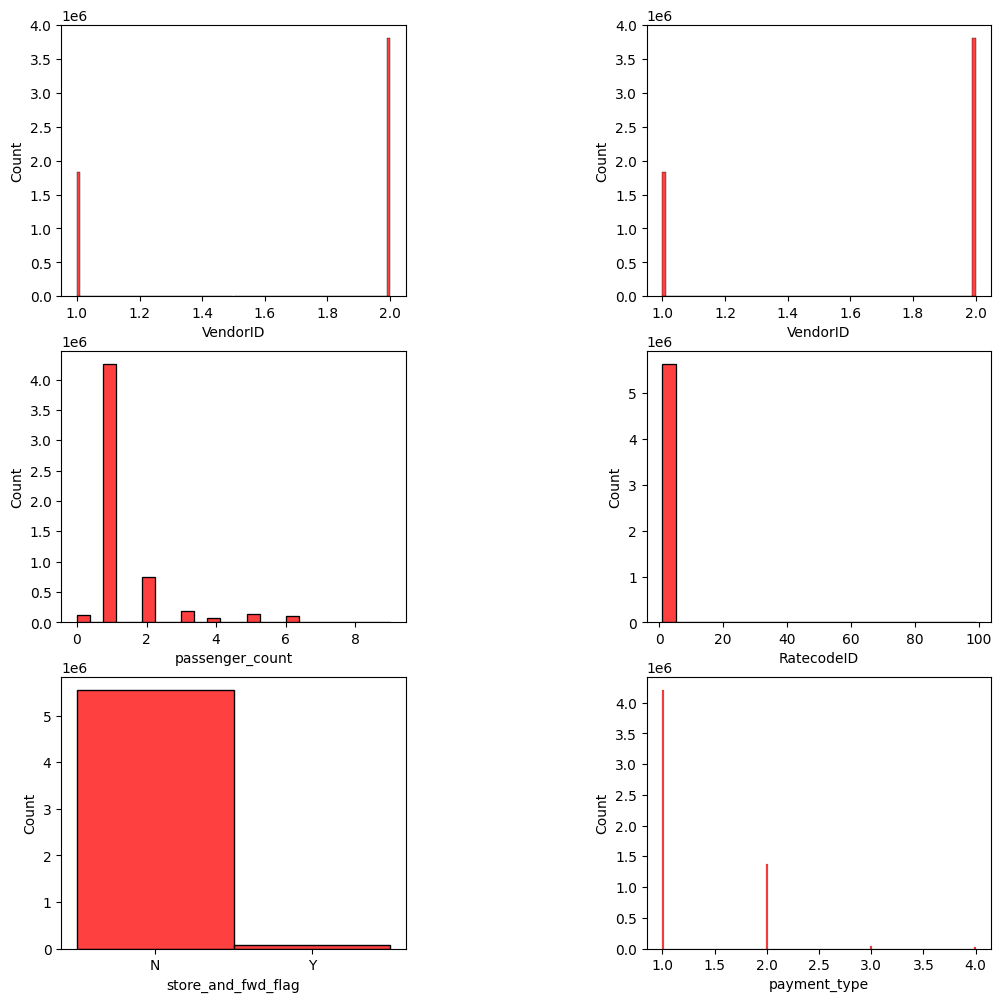

In [42]:
# Vizualize data with non NaN value

import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(3, 2, figsize = (12,12))
f.subplots_adjust(wspace=0.7)
axes = axes.flatten()

sns.histplot(df_temp['VendorID'], color = 'r', ax=axes[0])
sns.histplot(df_temp['VendorID'], color = 'r', ax=axes[1])
sns.histplot(df_temp['passenger_count'], color = 'r', ax=axes[2])
sns.histplot(df_temp['RatecodeID'], color = 'r', ax=axes[3])
sns.histplot(df_temp['store_and_fwd_flag'], color = 'r', ax=axes[4])
sns.histplot(df_temp['payment_type'], color = 'r', ax=axes[5])

<Axes: xlabel='payment_type', ylabel='Count'>

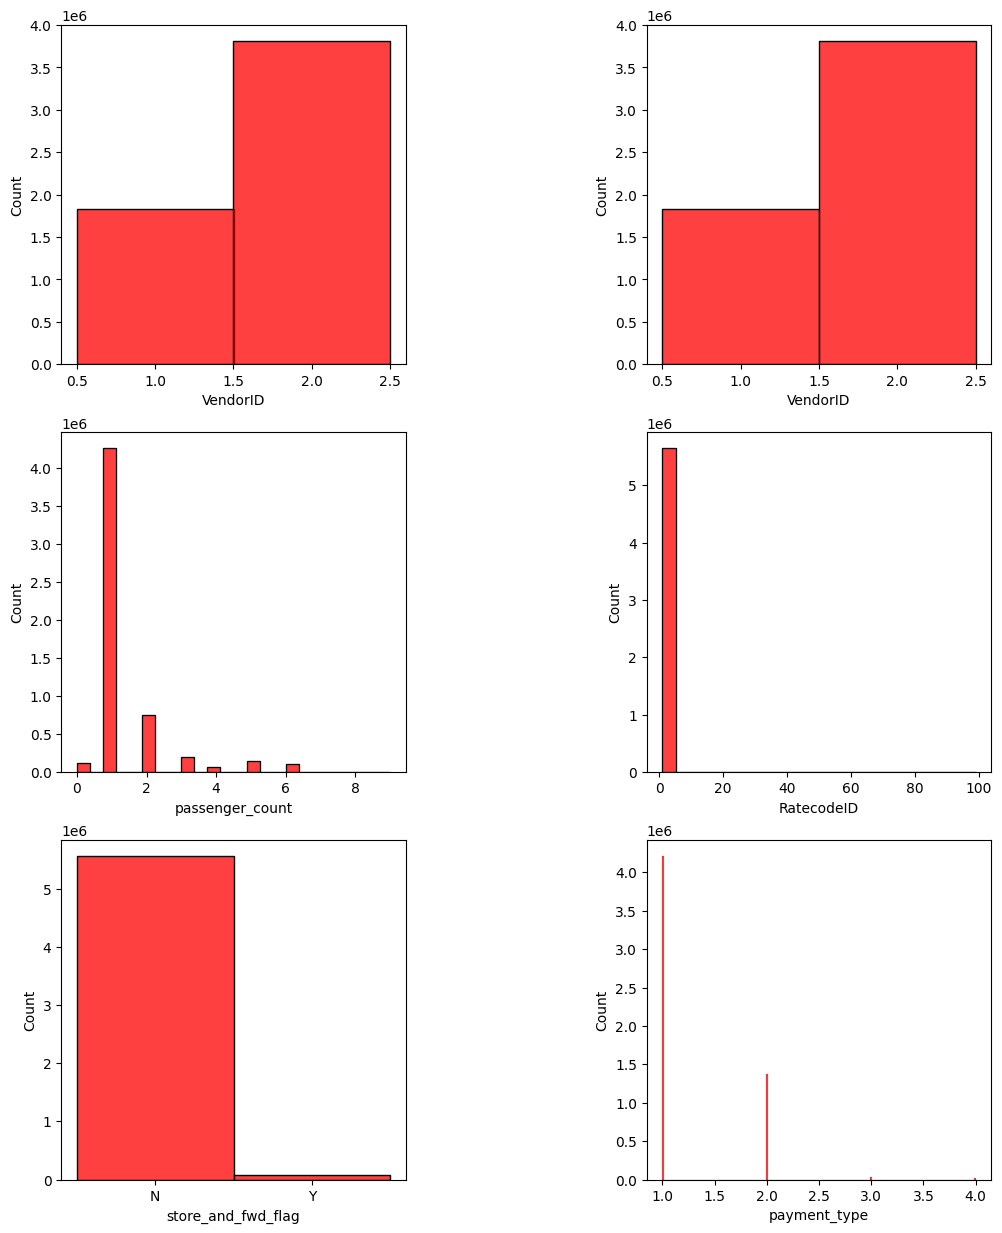

In [43]:
# Visualize data for non NaN value for 2021

f, axes = plt.subplots(3, 2, figsize = (12,15))
f.subplots_adjust(wspace=0.7)
axes = axes.flatten()

sns.histplot(df_2021['VendorID'], color = 'r', ax=axes[0])
sns.histplot(df_2021['VendorID'], color = 'r', ax=axes[1])
sns.histplot(df_2021['passenger_count'], color = 'r', ax=axes[2])
sns.histplot(df_2021['RatecodeID'], color = 'r', ax=axes[3])
sns.histplot(df_2021['store_and_fwd_flag'], color = 'r', ax=axes[4])
sns.histplot(df_2021['payment_type'], color = 'r', ax=axes[5])

<Axes: xlabel='tpep_pickup_datetime', ylabel='payment_type'>

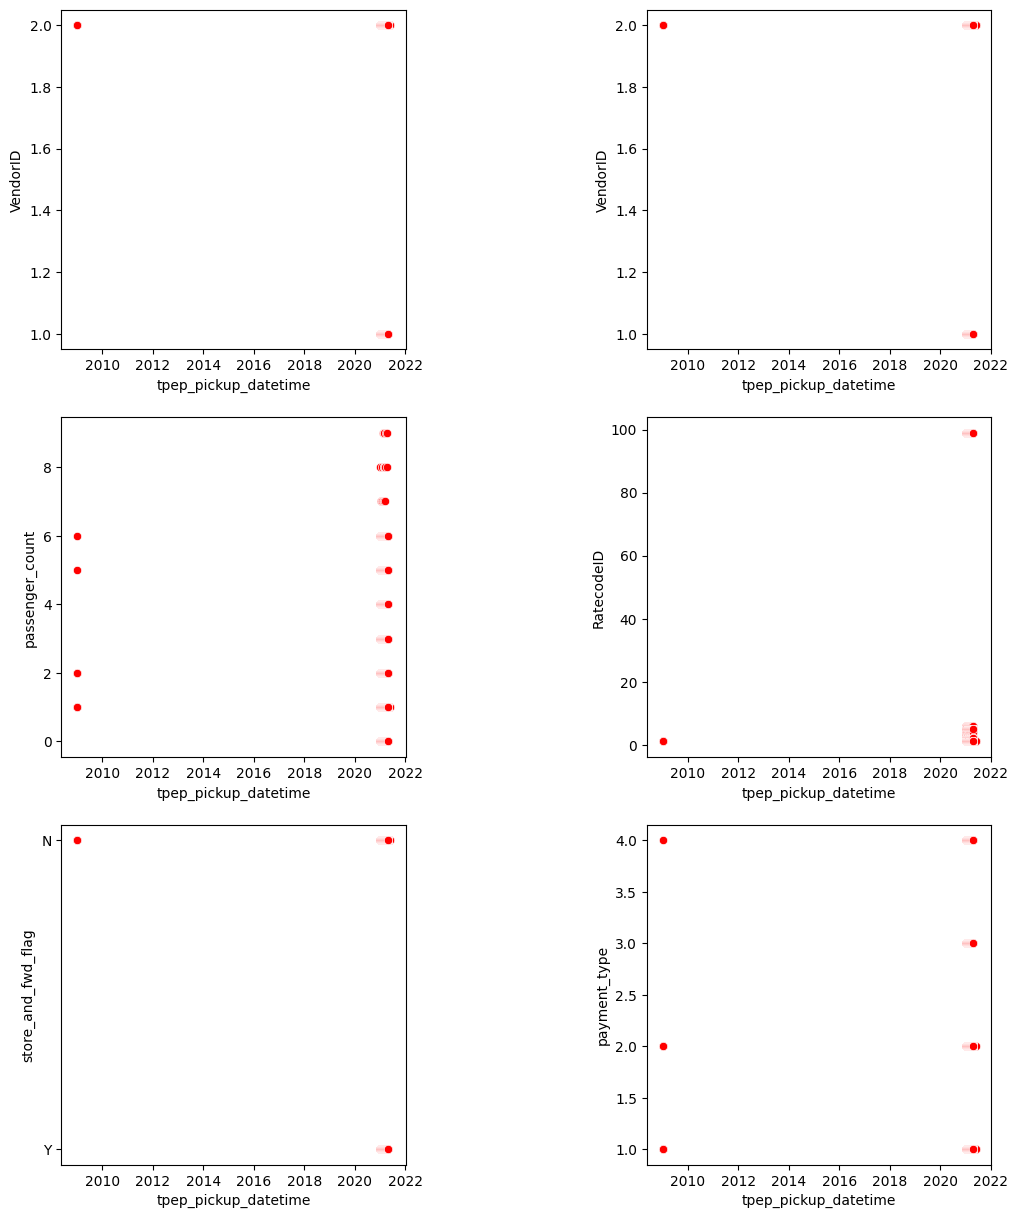

In [93]:
f, axes = plt.subplots(3, 2, figsize = (12,15))
f.subplots_adjust(wspace=0.7)
axes = axes.flatten()

sns.scatterplot(data=df_temp, x='tpep_pickup_datetime', y='VendorID', color = 'r', ax=axes[0])
sns.scatterplot(data=df_temp, x='tpep_pickup_datetime', y='VendorID', color = 'r', ax=axes[1])
sns.scatterplot(data=df_temp, x='tpep_pickup_datetime', y='passenger_count', color = 'r', ax=axes[2])
sns.scatterplot(data=df_temp, x='tpep_pickup_datetime', y='RatecodeID', color = 'r', ax=axes[3])
sns.scatterplot(data=df_temp, x='tpep_pickup_datetime', y='store_and_fwd_flag', color = 'r', ax=axes[4])
sns.scatterplot(data=df_temp, x='tpep_pickup_datetime', y='payment_type', color = 'r', ax=axes[5])



# fillna

In [111]:
df['passenger_count'].fillna(1.0, inplace=True)

In [113]:
df['RatecodeID'].fillna(1.0, inplace=True)

In [114]:
df['store_and_fwd_flag'].fillna('N', inplace=True)

In [116]:
df['payment_type'].fillna(1.0, inplace=True)

# fillna VendorID

In [118]:
def check_distributed(df):
    df_temp = df[df['VendorID'].notna()]
    df_temp['VendorID'] = df_temp['VendorID'].astype('int64')
    
    VendorID_temp = df_temp['VendorID']
    first_count_cate_value = VendorID_temp.value_counts().values.tolist()[0]
    second_count_cate_value = VendorID_temp.value_counts().values.tolist()[1]
    return (first_count_cate_value/(first_count_cate_value + second_count_cate_value),  second_count_cate_value/(second_count_cate_value + first_count_cate_value))

In [119]:
df_f = df.copy()
df_b = df.copy()
df_f['VendorID'] = df_f['VendorID'].fillna(method='ffill')
df_b['VendorID'] = df_b['VendorID'].fillna(method='bfill')

In [120]:
dis_origin = check_distributed(df)
diss_ffill = check_distributed(df_f)
diss_bfill = check_distributed(df_b)

C:\Users\trang\AppData\Local\Temp\ipykernel_21444\1052256306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['VendorID'] = df_temp['VendorID'].astype('int64')


In [121]:
print("Origin: ", dis_origin)
print("f: ", diss_ffill)
print("b: ", diss_bfill)

Origin:  (0.6760722931708545, 0.3239277068291455)
f:  (0.6772243392014008, 0.32277566079859926)
b:  (0.672251402608102, 0.32774859739189804)


In [122]:
df['VendorID'] = df['VendorID'].fillna(method='ffill')

In [123]:
df['VendorID'] = df['VendorID'].astype('int64')
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [124]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

# Export Clean Data

In [126]:
df.to_csv('Clean_Yellow_Taxi_Trip.csv')